In [44]:
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [47]:
df.isnull().mean()*100
# * Note : Age contains 19 % missing values
# * Note : Fare contains 5% missing values

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [48]:
from sklearn.model_selection import train_test_split

x = df.drop(['Survived'],axis=1)
y = df[['Survived']]

x_train,x_test,y_train,y_test = train_test_split(x,y)
x_train.shape,x_test.shape

((668, 3), (223, 3))

In [49]:
age_median = df['Age'].median()
age_mean = df['Age'].mean()

fare_median = df['Fare'].median()
fare_mean = df['Fare'].mean()

In [50]:
df['age_mean'] = df[['Age']].fillna(age_mean)
df['age_median'] = df[['Age']].fillna(age_median)

df['fare_mean'] = df[['Fare']].fillna(fare_mean)
df['fare_median'] = df[['Fare']].fillna(fare_median)

df

,Age,Fare,Family,Survived,age_mean,age_median,fare_mean,fare_median
0,22.0,7.2500,1,0,22.000000,22.0,7.250000,7.2500
1,38.0,71.2833,1,1,38.000000,38.0,71.283300,71.2833
2,26.0,7.9250,0,1,26.000000,26.0,7.925000,7.9250
3,35.0,53.1000,1,1,35.000000,35.0,53.100000,53.1000
4,35.0,8.0500,0,0,35.000000,35.0,8.050000,8.0500
...,...,...,...,...,...,...,...,...
886,27.0,13.0000,0,0,27.000000,27.0,13.000000,13.0000
887,19.0,30.0000,0,1,19.000000,19.0,30.000000,30.0000
888,NaN,23.4500,3,0,29.699118,28.0,23.450000,23.4500
889,26.0,NaN,0,1,26.000000,26.0,32.279338,14.4542


In [51]:
print("Age var : ",df['Age'].var())
print("age_mean var : ",df['age_mean'].var())
print("age_median var : ",df['age_median'].var())


print('fare var : ',df['Fare'].var())
print('fare_mean var : ',df['fare_mean'].var())
print('fare_median var : ',df['fare_median'].var())


Age var :  211.0191247463081
age_mean var :  169.05239993721085
age_median var :  169.51249827942328
fare var :  2530.6730768999487
fare_mean var :  2402.717696607255
fare_median var :  2417.971599672526


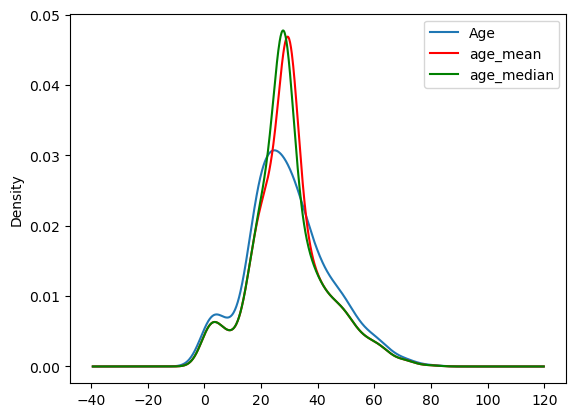

In [52]:
fig = plt.figure()
ax = fig.add_subplot()

# orginal data
df['Age'].plot(kind='kde')

# mean imputation
df['age_mean'].plot(kind='kde',color='red')

# median imputation
df['age_median'].plot(kind='kde',color='green')

plt.legend()

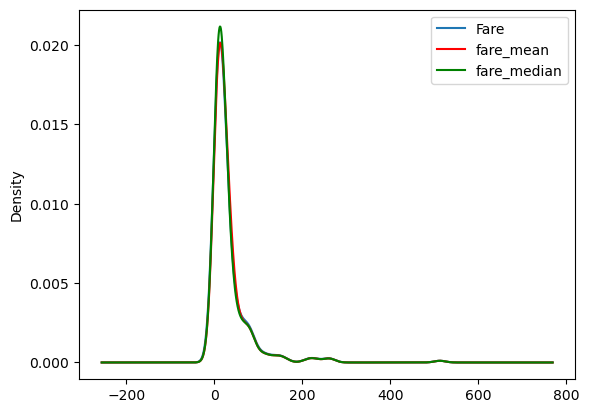

In [53]:
fig = plt.figure()
ax = fig.add_subplot()

# original data 
df['Fare'].plot(kind='kde')

# mean imputaion
df['fare_mean'].plot(kind='kde',color='red')

# median imputation
df['fare_median'].plot(kind='kde',color='green')
plt.legend()

<Axes: >

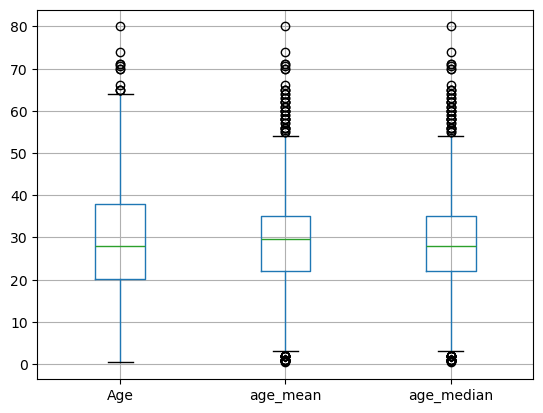

In [54]:
df[['Age','age_mean','age_median']].boxplot()
# in age outliers are increased

<Axes: >

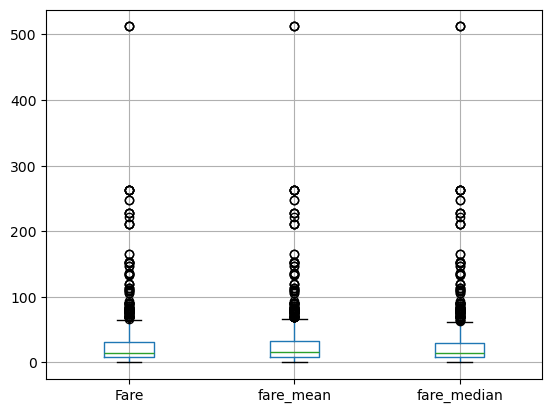

In [55]:
df[['Fare','fare_mean','fare_median']].boxplot()
# there is no change in outliers of fare after imputation

In [56]:
df.cov()

,Age,Fare,Family,Survived,age_mean,age_median,fare_mean,fare_median
Age,211.019125,78.071438,-6.507525,-0.551296,211.019125,211.019125,73.727862,73.196997
Fare,78.071438,2530.673077,17.460363,6.442361,62.210610,65.546143,2530.673077,2530.673077
Family,-6.507525,17.460363,2.603248,0.013063,-5.213332,-5.159658,16.577535,16.611725
Survived,-0.551296,6.442361,0.013063,0.236772,-0.441656,-0.411226,6.116624,6.021945
age_mean,211.019125,62.210610,-5.213332,-0.441656,169.052400,169.052400,59.065130,58.639842
age_median,211.019125,65.546143,-5.159658,-0.411226,169.052400,169.512498,62.232012,61.706696
fare_mean,73.727862,2530.673077,16.577535,6.116624,59.065130,62.232012,2402.717697,2402.717697
fare_median,73.196997,2530.673077,16.611725,6.021945,58.639842,61.706696,2402.717697,2417.971600


In [57]:
df.corr()

,Age,Fare,Family,Survived,age_mean,age_median,fare_mean,fare_median
Age,1.000000,0.099481,-0.301914,-0.077221,1.000000,1.000000,0.097273,0.096203
Fare,0.099481,1.000000,0.212626,0.263920,0.094681,0.099626,1.000000,1.000000
Family,-0.301914,0.212626,1.000000,0.016639,-0.248512,-0.245619,0.209609,0.209378
Survived,-0.077221,0.263920,0.016639,1.000000,-0.069809,-0.064910,0.256445,0.251678
age_mean,1.000000,0.094681,-0.248512,-0.069809,1.000000,0.998642,0.092676,0.091718
age_median,1.000000,0.099626,-0.245619,-0.064910,0.998642,1.000000,0.097513,0.096384
fare_mean,0.097273,1.000000,0.209609,0.256445,0.092676,0.097513,1.000000,0.996841
fare_median,0.096203,1.000000,0.209378,0.251678,0.091718,0.096384,0.996841,1.000000


### by sklean

In [58]:
df = pd.read_csv('titanic_toy.csv')
x = df.drop(['Survived'],axis=1)
y = df[['Survived']]

In [59]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y)

In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

trf_age = SimpleImputer(strategy='mean')
trf_fare = SimpleImputer(strategy='median')

trf = ColumnTransformer([
    ('trf1',trf_age,['Age']),
    ('trf2',trf_fare,['Fare'])
],remainder='passthrough')

x_train_imputed = trf.fit_transform(x_train)
x_test_imputed = trf.transform(x_test)

In [61]:
x_train_imputed

array([[  3.        ,  41.5792    ,   3.        ],
       [ 29.19753704,   0.        ,   0.        ],
       [ 23.        ,  11.5       ,   3.        ],
       ...,
       [ 25.        ,   7.05      ,   0.        ],
       [ 31.        , 164.8667    ,   2.        ],
       [ 30.        ,   9.5       ,   0.        ]])